# Classification Algorithms (Introductory)

## Supervised Learning with Scikit-Learn

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

Importing the required libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the dataset

In [48]:
table = pd.read_table('fruits.txt')
table.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [49]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [50]:
table.shape

(59, 7)

In [51]:
table.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [52]:
table.isna()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [53]:
table.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [54]:
table.keys()

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [55]:
table['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [56]:
table.groupby('fruit_name').sum()

,fruit_label,mass,width,height,color_score
fruit_name,,,,,
apple,19,3136,141.7,139.5,14.89
lemon,64,2400,104.2,141.7,11.49
mandarin,10,406,29.7,21.9,3.98
orange,57,3682,143.6,150.8,14.65


In [57]:
table.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

## Visualizations of the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


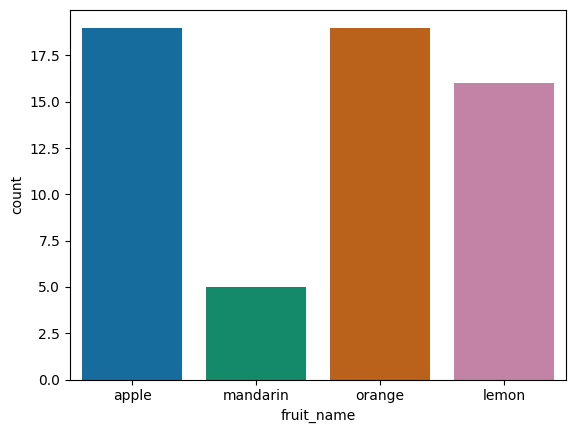

In [58]:
import seaborn as sns
sns.countplot(table['fruit_name'],label="Count")
plt.show()

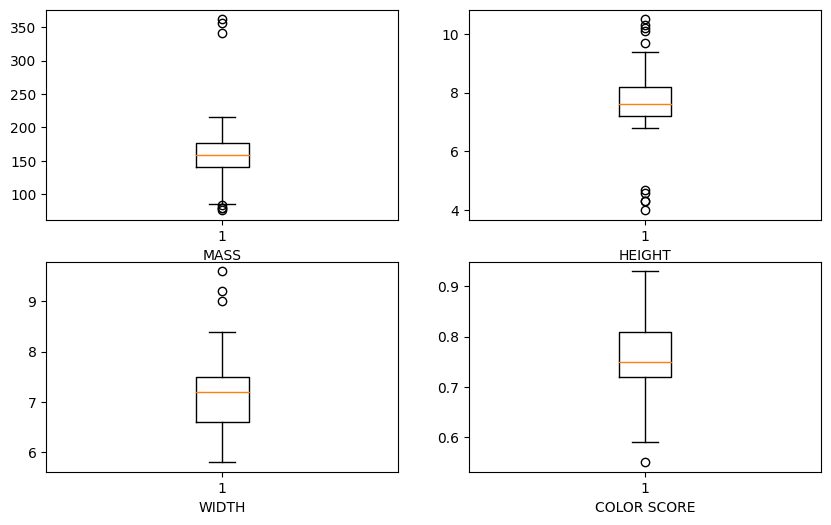

In [59]:
plt.style.use('default')
fig, ax = plt.subplots(2,2)
fig.set_size_inches([10,6])
ax[0,0].boxplot (table['mass'])
ax[0,0].set_xlabel("MASS")
ax[0,1].boxplot (table['height'])
ax[0,1].set_xlabel("HEIGHT")
ax[1,0].boxplot (table['width'])
ax[1,0].set_xlabel("WIDTH")
ax[1,1].boxplot (table['color_score'])
ax[1,1].set_xlabel("COLOR SCORE")
plt.show()

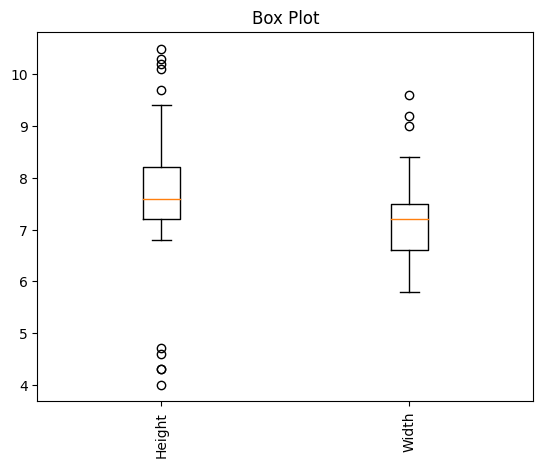

In [60]:
plt.style.use('default')
fig,ax = plt.subplots()
ax.boxplot([table['height'], table['width']])
ax.set_xticklabels(['Height', 'Width'], rotation=90)
plt.title("Box Plot")
plt.show()

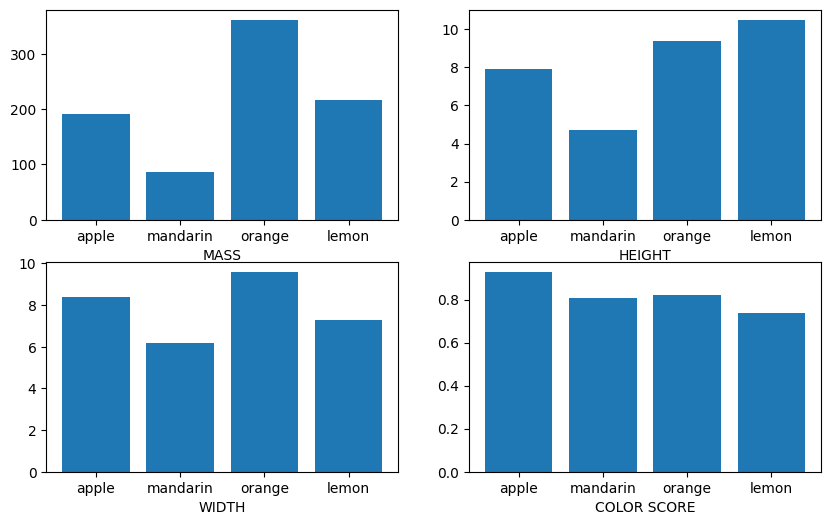

In [61]:
plt.style.use('default')
fig, ax = plt.subplots(2,2)
fig.set_size_inches([10,6])
ax[0,0].bar (table['fruit_name'], table['mass'])
ax[0,0].set_xlabel("MASS")
ax[0,1].bar (table['fruit_name'],table['height'])
ax[0,1].set_xlabel("HEIGHT")
ax[1,0].bar (table['fruit_name'],table['width'])
ax[1,0].set_xlabel("WIDTH")
ax[1,1].bar (table['fruit_name'],table['color_score'])
ax[1,1].set_xlabel("COLOR SCORE")
plt.show()

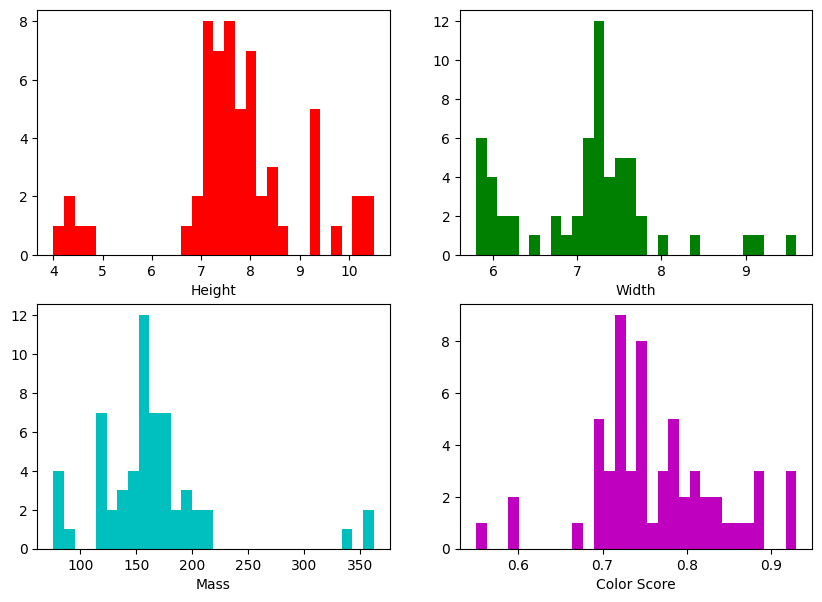

In [62]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
ax[0,0].hist(table['height'],bins=30, color="r")
ax[0,0].set_xlabel("Height")
ax[0,1].hist(table['width'],bins=30, color="g")
ax[0,1].set_xlabel("Width")
ax[1,0].hist(table['mass'],bins=30, color="c")
ax[1,0].set_xlabel("Mass")
ax[1,1].hist(table['color_score'],bins=30, color="m")
ax[1,1].set_xlabel("Color Score")
plt.show()

### Create Training and Test Sets and Apply Scaling

In [63]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = table[feature_names]
y = table['fruit_label']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

model = logreg.fit(scaled_X_train, y_train)
y_pred = model.predict(X_test)

score1  = model.score(scaled_X_test, y_test)
print("Prediction Score of Logistic Regression Model is:",score1)

Prediction Score of Logistic Regression Model is: 0.4666666666666667


## Decision Tree Classifier


In [67]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

decision.fit(scaled_X_train, y_train)
decision.predict(scaled_X_test)

score2 = decision.score(scaled_X_test, y_test)
print("Prediction Score of Decision Tree Classifier on test data is:",score2) 

Prediction Score of Decision Tree Classifier on test data is: 0.8666666666666667


## K Nearest Neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
knn.fit(scaled_X_train, y_train)
knn.predict(scaled_X_test)
score3  = knn.score(scaled_X_test, y_test)
print("Prediction score of KNN Model is:", score3)

Prediction score of KNN Model is: 0.9333333333333333


## Support Vector Machines


In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svc = SVC()
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
svc.fit(scaled_X_train,y_train)
svc.predict(scaled_X_test)
score4 = svc.score(scaled_X_test, y_test)
print("Prediction Score of SVC model is:",score4)

Prediction Score of SVC model is: 0.9333333333333333


In [70]:
scores_list = [score1,score2,score3, score4]
list = ['logistic_regression', 'decision_tree', 'knn', 'svm']

print("Prediction scores are:",scores_list)


Prediction scores are: [0.4666666666666667, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333]


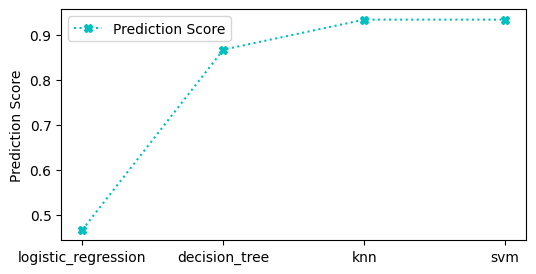

In [71]:
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(list, scores_list, marker="X", linestyle=":", color ="c", label="Prediction Score")
ax.set_xticklabels(list)
ax.set_ylabel("Prediction Score")
ax.legend()
plt.show()